In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [300]:
flights_df = pd.read_csv("flights.csv", low_memory=False)
airports_df = pd.read_csv("airports.csv", low_memory=False)
airlines_df = pd.read_csv("airlines.csv", low_memory=False)
l_airport_id = pd.read_csv("L_AIRPORT_ID.csv", low_memory=False)
l_airport = pd.read_csv("L_AIRPORT.csv", low_memory=False)

# Бизнес-анализ данных

## На какие месяца приходится пик перелетов и когда отмечается спад

In [301]:
# выбор необходимых нам столбцов
flights_df_sep = flights_df[['MONTH', 'FLIGHT_NUMBER']]

# словарь с названиями месяцев
month = {'01': 'Janauary',
         '02': 'February',
         '03': 'March',
         '04': 'April',
         '05': 'May',
         '06': 'June',
         '07': 'July',
         '08': 'August',
         '09': 'September',
         '10': 'October',
         '11': 'November',
         '12': 'December'}

for idx, name in enumerate([i for i in month.values()]):
    # замена чисел на их названия
    flights_df_sep['MONTH'] = flights_df_sep['MONTH'].replace(idx+1, name)

# Группировка по полетам
grouped_flights_df = flights_df_sep.groupby("MONTH")["FLIGHT_NUMBER"].count()
grouped_flights_df = grouped_flights_df.rename_axis("MONTH").reset_index()

# Подготовка к сортировке по месяцам
grouped_flights_df['MONTH'] = pd.Categorical(grouped_flights_df['MONTH'], categories=[
                                             i for i in month.values()], ordered=True)

# Сортировка по месяцам и ресет индексов
grouped_flights_df = grouped_flights_df.sort_values(by='MONTH')
grouped_flights_df = grouped_flights_df.reset_index(drop=True)

grouped_flights_df


C:\Users\grias\AppData\Local\Temp\ipykernel_13328\439240285.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_df_sep['MONTH'] = flights_df_sep['MONTH'].replace(idx+1, name)


,MONTH,FLIGHT_NUMBER
0,Janauary,469968
1,February,429191
2,March,504312
3,April,485151
4,May,496993
5,June,503897
6,July,520718
7,August,510536
8,September,464946
9,October,486165


In [302]:
# выбор необходимых нам столбцов
flights_df_sep = flights_df[['MONTH', 'FLIGHT_NUMBER']]

# словарь с названиями месяцев
month = {'01': 'Janauary',
         '02': 'February',
         '03': 'March',
         '04': 'April',
         '05': 'May',
         '06': 'June',
         '07': 'July',
         '08': 'August',
         '09': 'September',
         '10': 'October',
         '11': 'November',
         '12': 'December'}

for idx, name in enumerate([i for i in month.values()]):
    # замена чисел на их названия
    flights_df_sep['MONTH'] = flights_df_sep['MONTH'].replace(idx+1, name)

# Группировка по полетам
grouped_flights_df = flights_df_sep.groupby("MONTH")["FLIGHT_NUMBER"].count()
grouped_flights_df = grouped_flights_df.rename_axis("MONTH").reset_index()

# Подготовка к сортировке по месяцам
grouped_flights_df['MONTH'] = pd.Categorical(grouped_flights_df['MONTH'], categories=[
                                             i for i in month.values()], ordered=True)

# Сортировка по месяцам и ресет индексов
grouped_flights_df = grouped_flights_df.sort_values(by='MONTH')
grouped_flights_df = grouped_flights_df.reset_index(drop=True)

grouped_flights_df


C:\Users\grias\AppData\Local\Temp\ipykernel_13328\439240285.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_df_sep['MONTH'] = flights_df_sep['MONTH'].replace(idx+1, name)


,MONTH,FLIGHT_NUMBER
0,Janauary,469968
1,February,429191
2,March,504312
3,April,485151
4,May,496993
5,June,503897
6,July,520718
7,August,510536
8,September,464946
9,October,486165


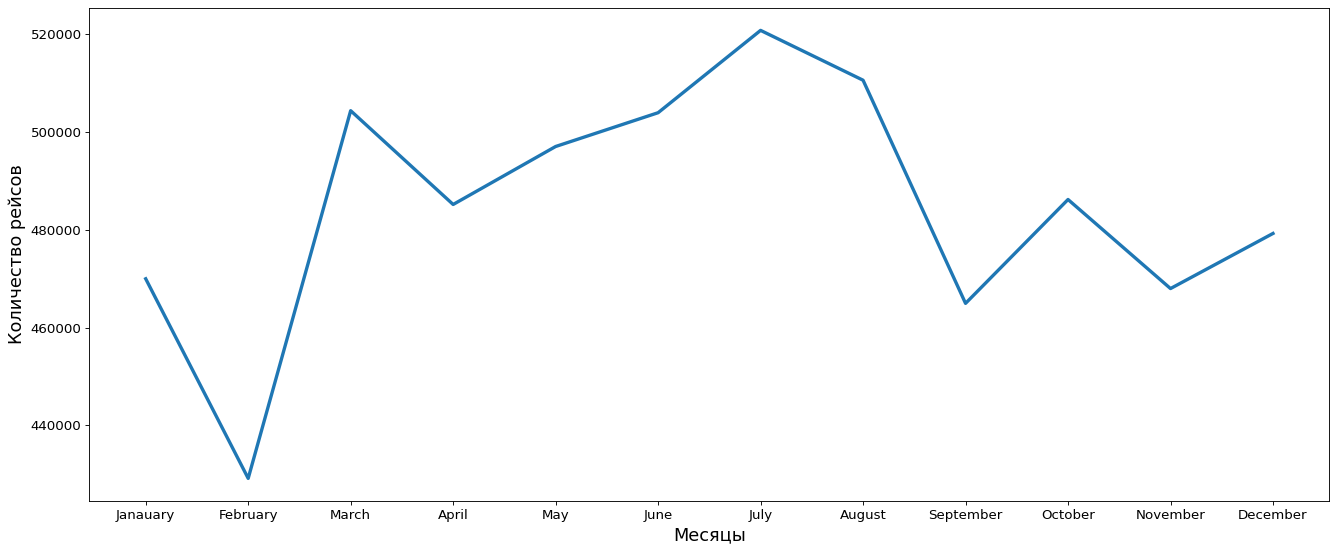

In [303]:
plt.figure(figsize=(20, 8), dpi=80)
plt.plot(grouped_flights_df['MONTH'],
         grouped_flights_df['FLIGHT_NUMBER'], linewidth=3)
plt.xlabel('Месяцы', fontsize=16)
plt.ylabel('Количество рейсов', fontsize=16)
plt.rcParams.update({'font.size': 12})


## Как распределено количество рейсов по дням недели в целом

In [304]:
# выбор необходимых нам столбцов
flights_df_sep = flights_df[['DAY_OF_WEEK', 'FLIGHT_NUMBER']]

days_of_week = {'01': 'Monday',
                '02': 'Tuesday',
                '03': 'Wednesday',
                '04': 'Thursday',
                '05': 'Friday',
                '06': 'Saturday',
                '07': 'Sunday', }

for idx, name in enumerate([i for i in days_of_week.values()]):
    # замена чисел на их названия
    flights_df_sep['DAY_OF_WEEK'] = flights_df_sep['DAY_OF_WEEK'].replace(
        idx+1, name)

# Группировка по полетам
grouped_flights_df = flights_df_sep.groupby(
    "DAY_OF_WEEK")["FLIGHT_NUMBER"].count()
grouped_flights_df = grouped_flights_df.rename_axis(
    "DAY_OF_WEEK").reset_index()

# Подготовка к сортировке по дням недели
grouped_flights_df['DAY_OF_WEEK'] = pd.Categorical(grouped_flights_df['DAY_OF_WEEK'], categories=[
    i for i in days_of_week.values()], ordered=True)

# Сортировка по дням недели и ресет индексов
grouped_flights_df = grouped_flights_df.sort_values(by='DAY_OF_WEEK')
grouped_flights_df = grouped_flights_df.reset_index(drop=True)

grouped_flights_df

C:\Users\grias\AppData\Local\Temp\ipykernel_13328\2957781046.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_df_sep['DAY_OF_WEEK'] = flights_df_sep['DAY_OF_WEEK'].replace(


,DAY_OF_WEEK,FLIGHT_NUMBER
0,Monday,865543
1,Tuesday,844600
2,Wednesday,855897
3,Thursday,872521
4,Friday,862209
5,Saturday,700545
6,Sunday,817764


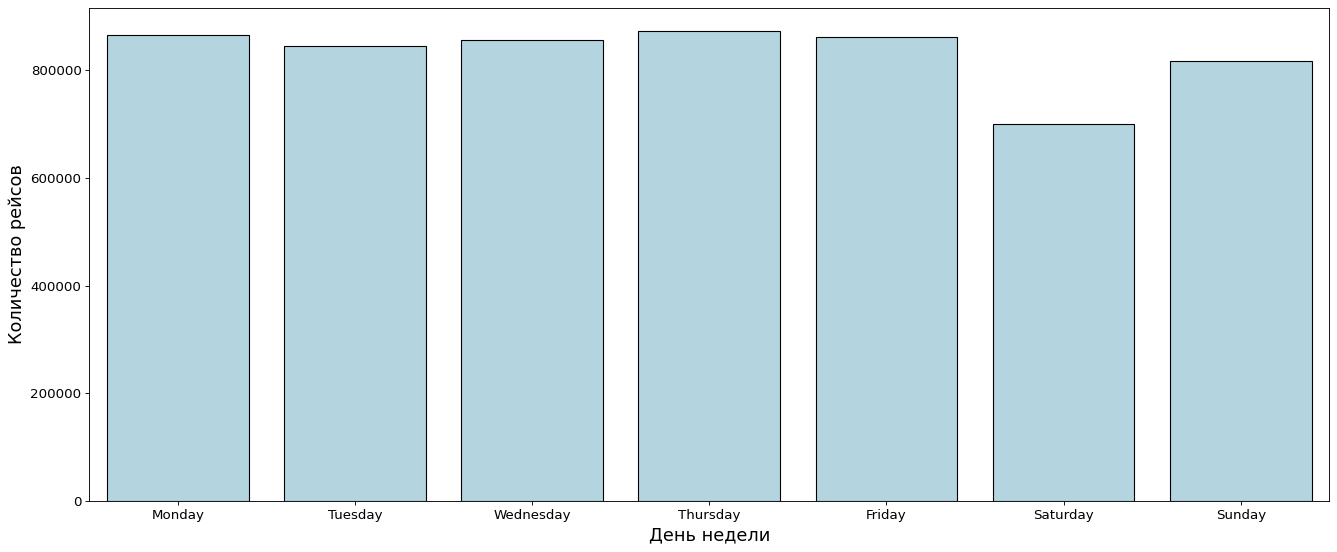

In [305]:
plt.figure(figsize=(20, 8), dpi=80)
sns.barplot(x=grouped_flights_df['DAY_OF_WEEK'],
            y=grouped_flights_df['FLIGHT_NUMBER'], color="lightblue", edgecolor='black')
plt.xlabel('День недели', fontsize=16)
plt.ylabel('Количество рейсов', fontsize=16)
plt.show()

## Топ 10 городов по количеству рейсов

In [306]:
airports_df.rename(columns={'IATA_CODE': 'id'}, inplace=True)
flights_df.rename(columns={'ORIGIN_AIRPORT': 'id'}, inplace=True)
joined_flights_airlines = pd.merge(flights_df, airports_df, on = 'id', how = 'inner')

In [307]:
joined_flights_airlines = joined_flights_airlines[["CITY", "FLIGHT_NUMBER"]]

joined_flights_airlines_sep = joined_flights_airlines[['CITY',"FLIGHT_NUMBER"]]

grouped_joined_flights_airlines = joined_flights_airlines_sep.groupby("CITY")["FLIGHT_NUMBER"].count()
grouped_joined_flights_airlines = grouped_joined_flights_airlines.rename_axis("CITY").reset_index()

grouped_joined_flights_airlines = grouped_joined_flights_airlines.sort_values(by='FLIGHT_NUMBER',ascending=False).head(10)
grouped_joined_flights_airlines = grouped_joined_flights_airlines.reset_index(drop=True)

grouped_joined_flights_airlines

,CITY,FLIGHT_NUMBER
0,Chicago,366770
1,Atlanta,346836
2,Dallas-Fort Worth,239551
3,Houston,198664
4,Denver,196055
5,Los Angeles,194673
6,New York,193416
7,San Francisco,148008
8,Phoenix,146815
9,Las Vegas,133181


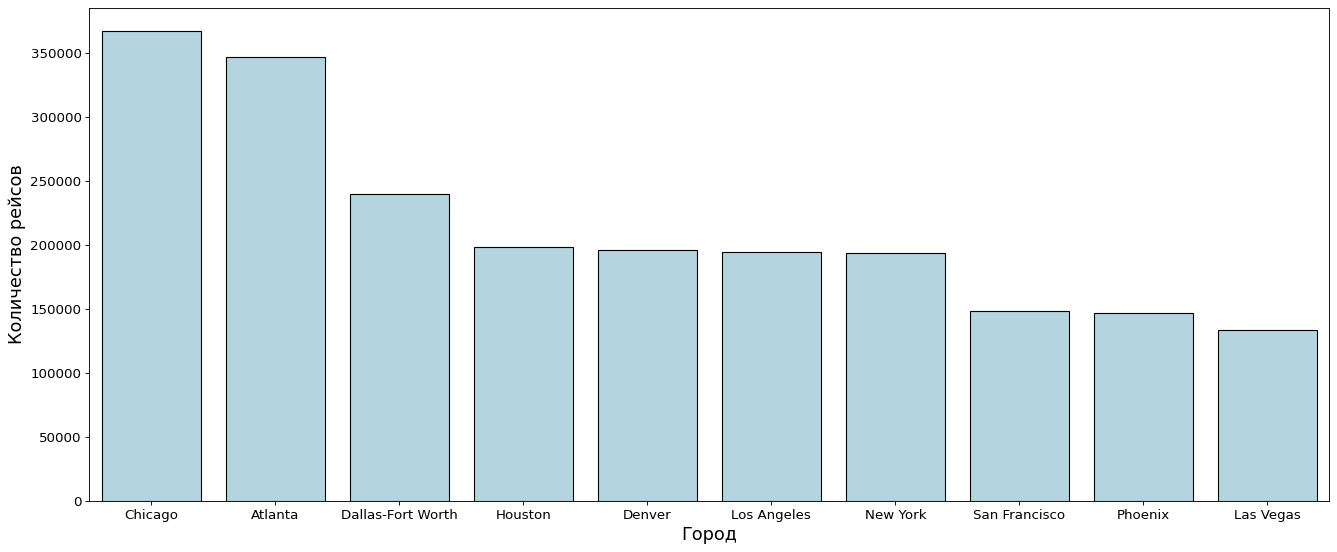

In [308]:
plt.figure(figsize=(20, 8), dpi=80)
sns.barplot(x=grouped_joined_flights_airlines['CITY'],
            y=grouped_joined_flights_airlines['FLIGHT_NUMBER'], color="lightblue", edgecolor='black')
plt.xlabel('Город', fontsize=16)
plt.ylabel('Количество рейсов', fontsize=16)
plt.show()

## Топ 10 авиакомпаний по количеству рейсов

In [309]:
flights_df.rename(columns = {'AIRLINE':'IATA_CODE'}, inplace=True)
joined_flights_airlines = pd.merge(flights_df, airlines_df, on = 'IATA_CODE', how = 'inner')

In [310]:
joined_flights_airlines_sep = joined_flights_airlines[['AIRLINE',"FLIGHT_NUMBER"]]

grouped_joined_flights_airlines = joined_flights_airlines_sep.groupby("AIRLINE")["FLIGHT_NUMBER"].count()
grouped_joined_flights_airlines = grouped_joined_flights_airlines.rename_axis("AIRLINE").reset_index()

grouped_joined_flights_airlines = grouped_joined_flights_airlines.sort_values(by='FLIGHT_NUMBER',ascending=False).head(10)
grouped_joined_flights_airlines = grouped_joined_flights_airlines.reset_index(drop=True)

grouped_joined_flights_airlines

,AIRLINE,FLIGHT_NUMBER
0,Southwest Airlines Co.,1261855
1,Delta Air Lines Inc.,875881
2,American Airlines Inc.,725984
3,Skywest Airlines Inc.,588353
4,Atlantic Southeast Airlines,571977
5,United Air Lines Inc.,515723
6,American Eagle Airlines Inc.,294632
7,JetBlue Airways,267048
8,US Airways Inc.,198715
9,Alaska Airlines Inc.,172521


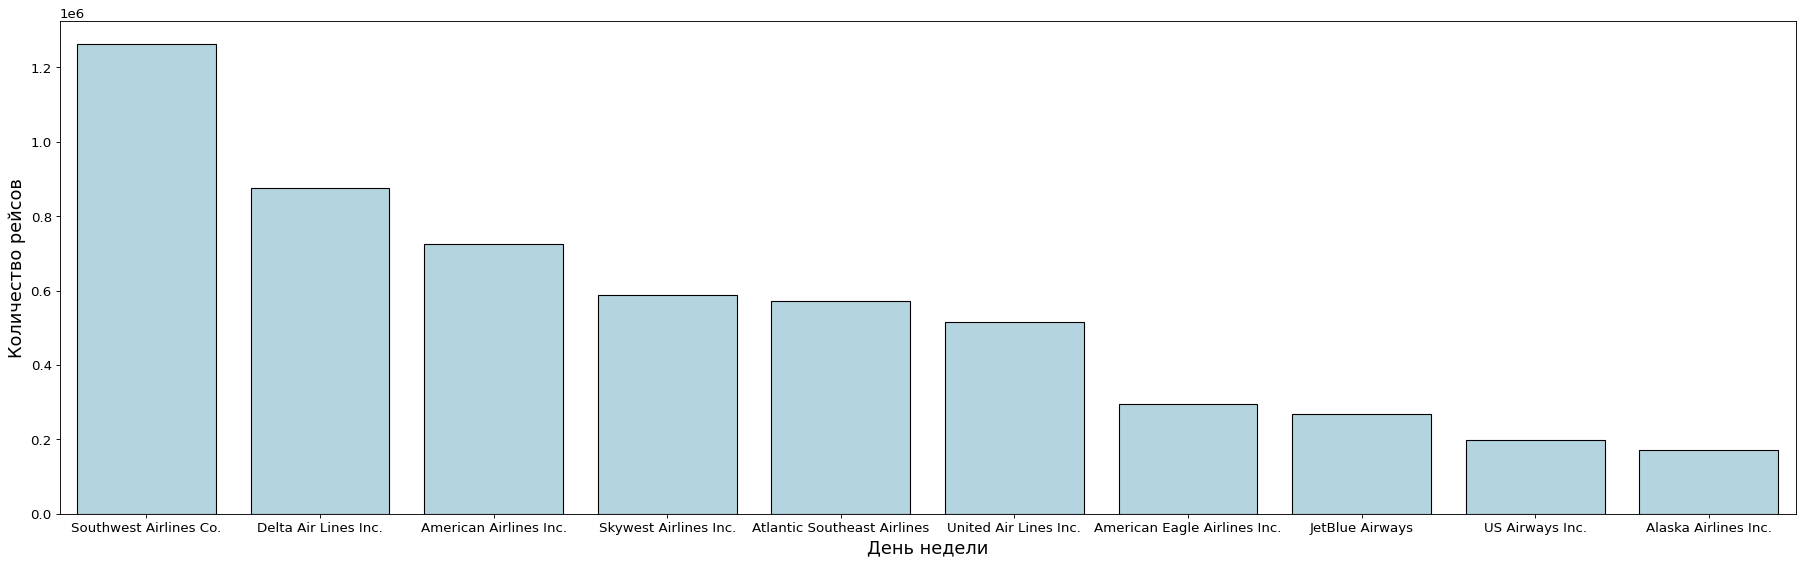

In [311]:
plt.figure(figsize=(28, 8), dpi=80)
sns.barplot(x=grouped_joined_flights_airlines['AIRLINE'],
            y=grouped_joined_flights_airlines['FLIGHT_NUMBER'], color="lightblue", edgecolor='black')
plt.xlabel('День недели', fontsize=16)
plt.ylabel('Количество рейсов', fontsize=16)
plt.show()

# Исследование данных

## Найти аэропорт с минимальной задержкой вылета

In [312]:
flights_df = pd.read_csv("flights.csv", low_memory=False)
airports_df = pd.read_csv("airports.csv", low_memory=False)

flights_df.rename(columns={'ORIGIN_AIRPORT': 'name'}, inplace=True)
airports_df.rename(columns = {'IATA_CODE': 'name'}, inplace=True)

In [313]:
joined_flights_airports=pd.merge(flights_df, airports_df, on = 'name', how = 'inner')
joined_flights_airports_sep=joined_flights_airports[["AIRPORT", "DEPARTURE_DELAY"]]

joined_flights_airports_sep=joined_flights_airports_sep.dropna()

In [314]:
grouped_joined_flights_airports = joined_flights_airports_sep.groupby("AIRPORT")["DEPARTURE_DELAY"].mean()
grouped_joined_flights_airports = grouped_joined_flights_airports.rename_axis("AIRPORT").reset_index()

grouped_joined_flights_airports = grouped_joined_flights_airports.sort_values(by='DEPARTURE_DELAY',ascending=True)
grouped_joined_flights_airports = grouped_joined_flights_airports.reset_index(drop=True)

airport_name = grouped_joined_flights_airports['AIRPORT'][0]
airport_delay = grouped_joined_flights_airports['DEPARTURE_DELAY'][0]

print(f"Аэропорт с самой минимальной задержкой вылета: {airport_name} \nСредняя задержка вылета равняется: {airport_delay}")

Аэропорт с самой минимальной задержкой вылета: Yakutat Airport 
Средняя задержка вылета равняется: -6.292237442922374


## Выявить самую пунктуальную авиакомпанию на прилет в *

In [315]:
flights_df = pd.read_csv("flights.csv", low_memory=False)
airlines_df = pd.read_csv("airlines.csv", low_memory=False)

flights_df.rename(columns = {'AIRLINE':'id'}, inplace=True)
airlines_df.rename(columns = {'IATA_CODE':'id'}, inplace=True)

In [316]:
airports_df = pd.read_csv("airports.csv", low_memory=False)
airports_df['IATA_CODE'][airports_df.index==216]

216    MSP
Name: IATA_CODE, dtype: object

In [317]:
joined_flights_airports = pd.merge(flights_df, airlines_df, on = 'id', how = 'inner')
joined_flights_airports_sep = joined_flights_airports[["id", "FLIGHT_NUMBER", "ARRIVAL_DELAY", "DESTINATION_AIRPORT", "AIRLINE"]]
joined_flights_airports_sep.rename(columns = {'DESTINATION_AIRPORT':'IATA_CODE'}, inplace=True)

airports_df = pd.read_csv("airports.csv")

joined_flights_airports_sep = pd.merge(joined_flights_airports_sep, airports_df, on = 'IATA_CODE', how = 'inner')
joined_flights_airports_sep = joined_flights_airports_sep[["FLIGHT_NUMBER", "IATA_CODE", "AIRPORT", "ARRIVAL_DELAY", "AIRLINE"]]

joined_flights_airports_sep = joined_flights_airports_sep[joined_flights_airports_sep["IATA_CODE"] == "MSP"]
joined_flights_airports_sep.rename(columns = {'ARRIVAL_DELAY':'DELAY'}, inplace=True )

C:\Users\grias\AppData\Local\Temp\ipykernel_13328\996730533.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_flights_airports_sep.rename(columns = {'DESTINATION_AIRPORT':'IATA_CODE'}, inplace=True)


In [318]:
grouped_joined_flights_airports = joined_flights_airports_sep.groupby("AIRLINE")["DELAY"].mean()
grouped_joined_flights_airports = grouped_joined_flights_airports.rename_axis("AIRPORT").reset_index()

grouped_joined_flights_airports = grouped_joined_flights_airports.sort_values(by='DELAY',ascending=True)
grouped_joined_flights_airports = grouped_joined_flights_airports.reset_index(drop=True)

airport_name = grouped_joined_flights_airports['AIRPORT'][0]
airport_delay = grouped_joined_flights_airports['DELAY'][0]

print(f"Аэропорт с самой минимальной задержкой прилета в MSP: {airport_name} \nСредняя задержка прилета равняется: {airport_delay}")

Аэропорт с самой минимальной задержкой прилета в MSP: Alaska Airlines Inc. 
Средняя задержка прилета равняется: -0.4658703071672355


## Найти аэропорт, где самолеты проводят в среднем больше всего времени на рулении

In [319]:
flights_df = pd.read_csv("flights.csv", low_memory=False)
airports_df = pd.read_csv("airports.csv", low_memory=False)

flights_df.rename(columns = {'ORIGIN_AIRPORT':'id'}, inplace=True) 
airports_df.rename(columns = {'IATA_CODE':'id'}, inplace=True) 

In [320]:
joined_flights_airports = pd.merge(flights_df, airports_df, on = 'id', how = 'inner')
joined_flights_airports_sep = joined_flights_airports[["id", "AIRPORT", "TAXI_OUT"]]

In [321]:
grouped_joined_flights_airports = joined_flights_airports_sep.groupby("AIRPORT")["TAXI_OUT"].mean()
grouped_joined_flights_airports = grouped_joined_flights_airports.rename_axis("AIRPORT").reset_index()

grouped_joined_flights_airports.columns=grouped_joined_flights_airports.columns.str.replace('TAXI_OUT','TAXI_OUT_mean')

In [322]:
flights_df = pd.read_csv("flights.csv", low_memory=False)
airports_df = pd.read_csv("airports.csv", low_memory=False)

flights_df.rename(columns = {'DESTINATION_AIRPORT':'id'}, inplace=True) 
airports_df.rename(columns = {'IATA_CODE':'id'}, inplace=True) 

In [323]:
joined_flights_airports = pd.merge(flights_df, airports_df, on = 'id', how = 'inner')
joined_flights_airports_sep = joined_flights_airports[["id", "AIRPORT", "TAXI_OUT"]]

In [324]:
grouped_joined_flights_airports2 = joined_flights_airports_sep.groupby("AIRPORT")["TAXI_OUT"].mean()
grouped_joined_flights_airports2 = grouped_joined_flights_airports2.rename_axis("AIRPORT").reset_index()

grouped_joined_flights_airports2.columns = grouped_joined_flights_airports2.columns.str.replace('TAXI_OUT','TAXI_IN_mean')

In [325]:
final_joined_df=pd.merge(grouped_joined_flights_airports, grouped_joined_flights_airports2, on = 'AIRPORT', how = 'inner')

final_joined_df

,AIRPORT,TAXI_OUT_mean,TAXI_IN_mean
0,Aberdeen Regional Airport,16.600302,18.350376
1,Abilene Regional Airport,9.188004,15.114850
2,Abraham Lincoln Capital Airport,12.863995,19.505898
3,Adak Airport,8.179775,11.573034
4,Akron-Canton Regional Airport,13.340333,16.606738
...,...,...,...
317,Yakutat Airport,7.919330,11.842266
318,Yampa Valley Airport (Yampa Valley Regional),17.448326,18.114162
319,Yeager Airport,14.189166,18.316760
320,Yellowstone Regional Airport,17.842266,20.298326


In [326]:
taxiing = max([sum(i) for i in zip(final_joined_df['TAXI_OUT_mean'],final_joined_df['TAXI_IN_mean'])])
taxiing2 = [sum(i) for i in zip(final_joined_df['TAXI_OUT_mean'],final_joined_df['TAXI_IN_mean'])]
taxiing_index = taxiing2.index(taxiing)

print(f"Аэропорт где самолеты проводят больше всего времени на рулении': {final_joined_df['AIRPORT'][taxiing_index]}, \nВремя: {taxiing}")

Аэропорт где самолеты проводят больше всего времени на рулении': LaGuardia Airport (Marine Air Terminal), 
Время: 45.065798556151286
